# **Sales Performance & Decision Making Using Statistics.**

## **Project Context (Business Scenario).**
You are a data analyst at a retail company that operates both online and physical stores. Management wants to understand:


- How sales are performing.
- How reliable the insights are.
- Whether a new marketing strategy is actually improving revenue.

You have been given sales transaction data for the last 3 years.

Your task is to use statistics (not machine learning) to analyze, infer, test claims, and make recommendations.

In [1]:
#@title Load the dataset.

import pandas as pd

df = pd.read_csv('statistics_sales_project_data.csv')
df.head()

,date,store_type,region,marketing_campaign,units_sold,revenue
0,2023-01-01,Online,Western,Yes,6,11876.03
1,2023-01-02,Physical,Rift Valley,Yes,8,14333.00
2,2023-01-03,Physical,Western,No,4,8101.97
3,2023-01-04,Physical,Coast,No,8,10928.92
4,2023-01-05,Online,Nairobi,No,9,18166.40


In [2]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                1200 non-null   str    
 1   store_type          1200 non-null   str    
 2   region              1200 non-null   str    
 3   marketing_campaign  1200 non-null   str    
 4   units_sold          1200 non-null   int64  
 5   revenue             1200 non-null   float64
dtypes: float64(1), int64(1), str(4)
memory usage: 56.4 KB


In [3]:
df.describe()

,units_sold,revenue
count,1200.000000,1200.000000
mean,4.976667,8271.974000
std,2.271289,4279.961469
min,0.000000,0.000000
25%,3.000000,5177.527500
50%,5.000000,7723.325000
75%,6.000000,10739.320000
max,15.000000,26885.870000


## **Part 1: Descriptive Statistics**
### **Task 1.1 - Measures of Central Tendency**
For **monthly revenue**:

- Calculate:
  - Mean.
  - Median.
  - Mode.

- **Explain which measure best represents revenue and why.** - The median best paints a true picture of the average monthly revenue as it is not affected by outliers that are present in our dataset, unlike the mean which is highly sensitive to outliers.


In [4]:
#@title Group days into months

df['date'] = pd.to_datetime(df['date'])

df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

df

,date,store_type,region,marketing_campaign,units_sold,revenue,year,month
0,2023-01-01,Online,Western,Yes,6,11876.03,2023,1
1,2023-01-02,Physical,Rift Valley,Yes,8,14333.00,2023,1
2,2023-01-03,Physical,Western,No,4,8101.97,2023,1
3,2023-01-04,Physical,Coast,No,8,10928.92,2023,1
4,2023-01-05,Online,Nairobi,No,9,18166.40,2023,1
...,...,...,...,...,...,...,...,...
1195,2026-04-10,Physical,Coast,No,9,19206.49,2026,4
1196,2026-04-11,Physical,Rift Valley,Yes,2,4469.23,2026,4
1197,2026-04-12,Physical,Rift Valley,No,5,8560.56,2026,4
1198,2026-04-13,Physical,Central,No,6,8324.26,2026,4


In [5]:
# Group revenue by month and aggregate.

months = (
    df
    .groupby(['year', 'month'], as_index=False)
    .agg(monthly_revenue = ('revenue', 'sum')))

months

,year,month,monthly_revenue
0,2023,1,280326.35
1,2023,2,256899.81
2,2023,3,243924.12
3,2023,4,206097.41
4,2023,5,261252.56
5,2023,6,224577.30
6,2023,7,215540.41
7,2023,8,266419.83
8,2023,9,271390.36
9,2023,10,257380.33


In [6]:
type(months)

pandas.DataFrame

In [7]:

# Mean
monthly_mean_revenue = months['monthly_revenue'].mean()
print(f'Mean: {monthly_mean_revenue:.2f}')

#Median
monthly_median_revenue = months['monthly_revenue'].median()
print(f'Median: {monthly_median_revenue:.2f}')


Mean: 248159.22
Median: 250308.55


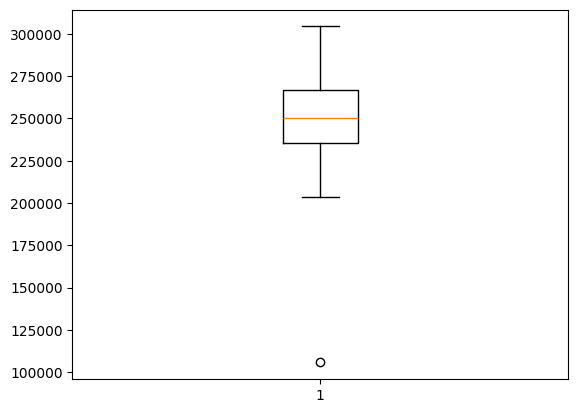

In [8]:
#@title Box plot
# Check for outliers.

import matplotlib.pyplot as plt

plt.boxplot(months['monthly_revenue'])
plt.show()

### **Task 1.2 – Dispersion**
Calculate:

- Range
- Variance
- Standard deviation

**Answer:**

**What does high standard deviation imply about sales stability?** - It shows that revenue may vary wildly from month to month, making it difficult to predict what you might earn in a particilar month. The standard deviation for our dataset is low, meaning the sales numbers are stable.

In [9]:
import numpy as np

#@title Range
range = max(months['monthly_revenue']) - min(months['monthly_revenue'])

print('Highest monthly earnings:', max(months['monthly_revenue']))
print('Lowest monthly earnings:', min(months['monthly_revenue']))

print('Range:', range)

Highest monthly earnings: 304378.36
Lowest monthly earnings: 105774.81
Range: 198603.55


In [10]:
#@title Variance and Standard Deviation.

var = np.var(months['monthly_revenue'])
print('Variance:', var)

std = np.std(months['monthly_revenue'])
print('Standard Deviation:', std)

Variance: 1169956760.24077
Standard Deviation: 34204.63068417447


### **Task 1.3 – Shape of Distribution**
Plot a histogram of revenue.
Identify:
- Normal.
- Positively skewed.
- Negatively skewed.

**Comment on skewness and kurtosis.**
- ***Skewness*** measures the symmetry of a distribution. A *normal distribution* has tails of equal length, as values are equally didtributed around the mean. This also makes it such that the mean, median and mode are all one value at the center of the distribution.

A *positively skewed* distribution has a longer tail to the right which makes the mean of the distribution larger than the median, and the median larger than the mode. This could indicate the presence of very large values present in the data.

A *negatively skewed* distribution has a longer tail to the right which makes the mean of the distribution lower than the median, and the median lower than the mode. This indicates that extremely low values are present in the data.

- ***Kurtosis*** measures how peaked or flat a distribution is. In a normal distribution, kurtosis = 3

*High kurtosis* (kurtosis > 3, excess kurtosis > 0) indicates a sharp peak, and that more values are more likely to be centred around the mean. It also indicates the likelihood of having heavier tails due to the presence of outliers.

*Low kurtosis* (kurtosis < 3, excess kurtosis <0) indicates a flat peak with lighter tails.

Our distribution is negatively skewed with a very high kurtosis value. This indicates the potential of outlier values that are extremely lower than the mean. It also indicates the possibility of extreme events happening such a month with very high revenue and another with very low revenue.

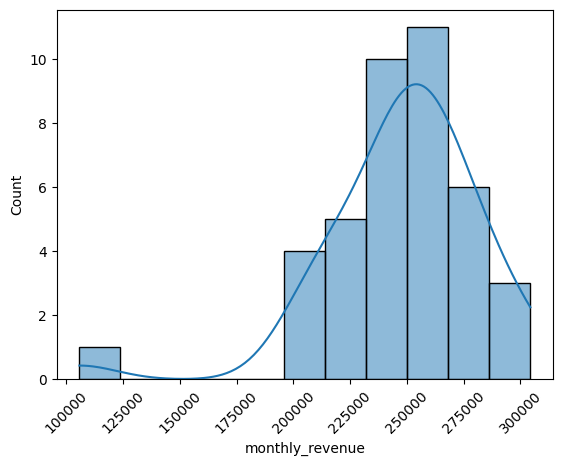

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(months['monthly_revenue'], kde=True)
plt.xticks(rotation=45) # rotate the x labels for better visibility.
plt.show()

In [12]:
# Calculate skewness and kurtosis
from scipy.stats import skew, kurtosis

skewness = months['monthly_revenue'].skew()
print('Skewness:', skewness)

kurtosis = months['monthly_revenue'].kurtosis()
print('Kurtosis:', kurtosis)

Skewness: -1.7049887533084118
Kurtosis: 6.215132581062658


## **PART 2: Data Visualization.**
Create:

- Line chart - Revenue over time.
- Bar chart - Revenue by store type.
- Box plot - Revenue distribution by region.
- Scatter plot - Marketing spend vs revenue.

Explain what each visualization reveals.

In [13]:
# Concatenate year and month columns into one YYYY-MM format column.
# Created a new dataframe, 'months' to hold monthly revenue data.

months['year-month'] = months['year'].astype(str) + '-' + months['month'].astype(str)
months.head()

months['year-month'] = pd.to_datetime(months['year-month']) # Convert string datatype into datetime
months.head()

,year,month,monthly_revenue,year-month
0,2023,1,280326.35,2023-01-01
1,2023,2,256899.81,2023-02-01
2,2023,3,243924.12,2023-03-01
3,2023,4,206097.41,2023-04-01
4,2023,5,261252.56,2023-05-01


In [14]:
months.info()

<class 'pandas.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   year             40 non-null     int32         
 1   month            40 non-null     int32         
 2   monthly_revenue  40 non-null     float64       
 3   year-month       40 non-null     datetime64[us]
dtypes: datetime64[us](1), float64(1), int32(2)
memory usage: 1.1 KB


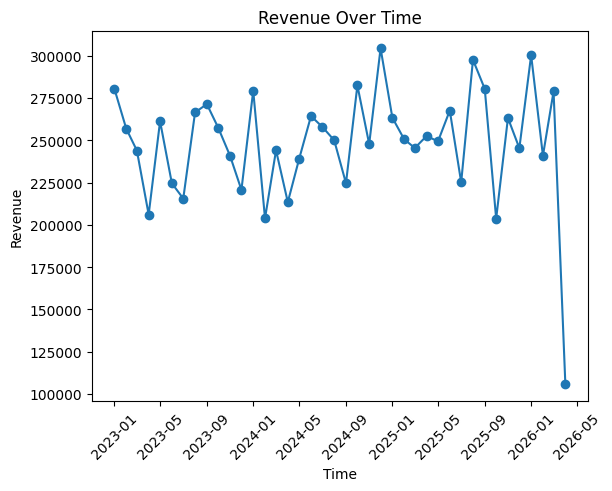

In [15]:
#@title Revenue Over Time.

plt.figure()
plt.plot(months['year-month'], months['monthly_revenue'], marker = 'o')
plt.xlabel('Time')
plt.ylabel('Revenue')
plt.title('Revenue Over Time')
plt.xticks(rotation=45)
plt.show()

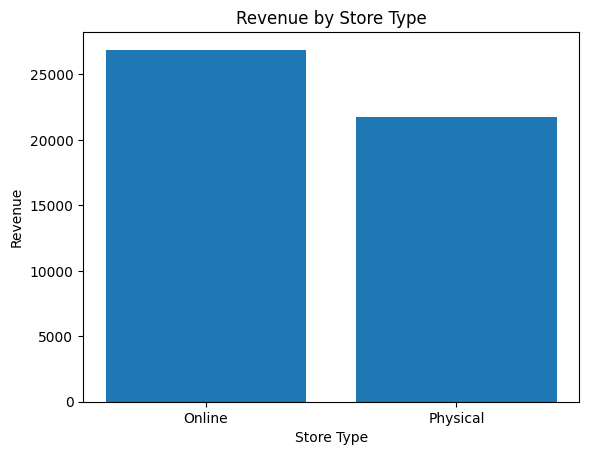

In [16]:
#@title Revenue by Store Type.

plt.figure()
plt.bar(df['store_type'], df['revenue'])
plt.xlabel('Store Type')
plt.ylabel('Revenue')
plt.title('Revenue by Store Type')
plt.show()

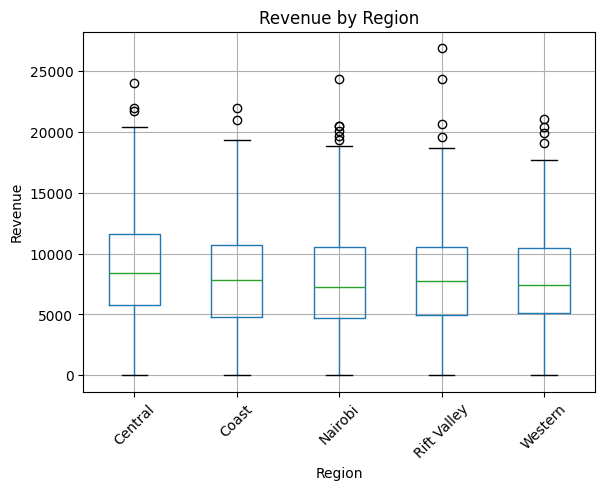

In [17]:
#@title Revenue by Region.

df.boxplot(column='revenue', by='region')
plt.suptitle('')
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.show()

## **PART 3: Sampling and Bias (Chapter 3).**
### **Task 3.1 – Population vs Sample.**
Define:
- **Population** - This refers to all members of a set or a certain group. In our case, this would include all the records in the dataset.
- **Sample** - This refers to a subset of the population that is selected for analysis. It is a representative of the entire population dynamics, and is used when studying the entire population is impractical. The sample helps us to make inferences about the entire population e.g. a sample of 50 students are selected to participate in a survey that would reflect the sentiments of the entire student body (population).

**Identify both in this project.** - In this project, the population = 1200. This is a relatively small dataset and we can use the entire population to perform our statistical analysis.

### **Task 3.2 – Sampling Bias**
Assume:

- Only urban stores were sampled.

Answer:

- What bias exists?
- How would it affect conclusions?
- Propose a better sampling method.

Sampling only urban stores is an example of ***selection bias***, where only some members of the population with similar traits are likely to be included in the sample more than others.

This could lead the analyst making a report that excludes the reality of stores that might be located in more remote locations with less customer traffic and possibly less revenue generated.

There are many ways to eliminate bias in sampling. A data analyst/scientist would use the following sampling techniques:
- **Random sampling** - This is a technique that ensures that each member of the population has an equal chance of being selected e.g. drawing names from a hat.
- **Stratified sampling** - This technique starts by dividing members of the population into distinct groups based on specific characteristics eg location, store type etc, then taking a random sample from each group.
- **Cluster sampling** - This technique involves dividing the members of a population into natural groupings, then randomly selecting entire clusters for the sample.
- **Systematic sampling** - This involves choosing every nth member of a population starting from a random point e.g every 10th store on the list.

## **PART 4: Law of Large Numbers and CLT.**
### **Task 4.1 – Law of Large Numbers.**
- Take increasing samples of revenue (n = 10, 50, 100, 500).
- Plot sample mean vs sample size.

**Explain convergence behavior.**

The *Law of Large Numbers (LLN)* is a principle that states that as the sample size increases, the sample mean gets closer to the population mean. This behaviour is known as ***convergence***.

In our dataset, we observe that a sample size of n = 500 gives a sample mean value that is the closest to the population mean. This is in perfect alignment with LLN. It is also interesting to observe that some lower values of n (50 and 100), have a much higher sample mean than population mean, which then comes down closer to the actual mean when the sample size is a higher number (n = 500).

In [18]:
population = df['revenue']
print('The population mean is:', population.mean())

# n = 10
sample_10 = population.sample(n=10, random_state=42)
s_mean_10 = sample_10.mean()

print('When n = 10, mean is:', s_mean_10)

# n = 50
sample_50 = population.sample(n=50, random_state=42)
s_mean_50 = sample_50.mean()

print('When n = 50, mean is:',s_mean_50)

# n = 100
sample_100 = population.sample(n=100, random_state=42)
s_mean_100 = sample_100.mean()

print('When n = 100, mean is:',s_mean_100)

# n = 500
sample_500 = population.sample(n=500, random_state=42)
s_mean_500 = sample_500.mean()

print('When n = 500, mean is:',s_mean_500)

# Create list for sample means
sample_means = [s_mean_10, s_mean_50, s_mean_100, s_mean_500]
sample_means

The population mean is: 8271.974
When n = 10, mean is: 8158.698999999999
When n = 50, mean is: 8486.380799999999
When n = 100, mean is: 8567.929
When n = 500, mean is: 8296.52228


[np.float64(8158.698999999999),
 np.float64(8486.380799999999),
 np.float64(8567.929),
 np.float64(8296.52228)]

In [19]:
# Faster alternative way of achieving what I did in the cell above.

sample_size = [10, 50, 100, 500]
sample_mean = []

for n in sample_size:
  sample = population.sample(n=n, random_state=42)
  sample_mean.append(sample.mean())

sample_mean

[np.float64(8158.698999999999),
 np.float64(8486.380799999999),
 np.float64(8567.929),
 np.float64(8296.52228)]

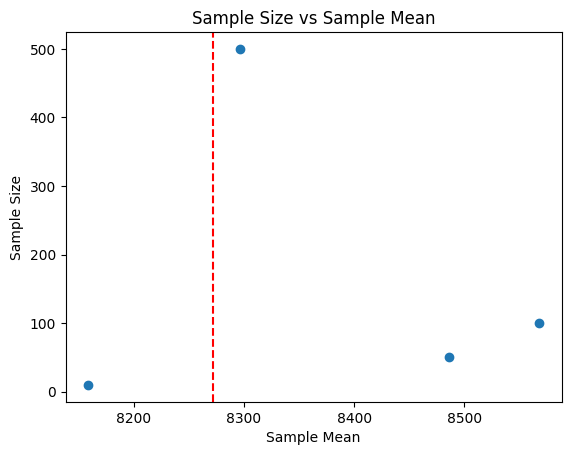

In [20]:
#@title Sample Mean vs Sample Size.

plt.scatter(sample_mean, sample_size)
plt.xlabel('Sample Mean')
plt.ylabel('Sample Size')
plt.axvline(population.mean(), color='r', linestyle='--')
plt.title('Sample Size vs Sample Mean')
plt.show()

### **Task 4.2 – Central Limit Theorem.**
- Draw 200 samples of size n = 30.
- Plot distribution of sample means.
- Explain why it becomes normal.

## **PART 5: Hypothesis Testing.**
**Business Question:**

Does running a marketing campaign increase average revenue per transaction?

### **Task 5.1 – Hypotheses.**
- H₀: Mean revenue (campaign) = Mean revenue (no campaign).
- H₁: Mean revenue (campaign) > Mean revenue (no campaign).

Specify:

- One-tail test
- Confidence level = 95%
- Alpha = 0.05

## **Task 5.2 – Statistical Test.**
- Perform a t-test
- Calculate:
  - Test statistic
  - P-value
- Decide:
  - Reject or fail to reject H₀

## **PART 6: Errors and Interpretation.**
### **Task 6.1 – Errors.**
Explain in context:

- Type I Error.
- Type II Error.

Example:

- What would a Type I error mean for the company?

## **PART 7: Effect Size and Power.**
### **Task 7.1 – Effect Size.**
- Calculate Cohen's d.
- Interpret:
  - Small / Medium / Large effect

### **Task 7.2 – Power Discussion.**
- Why might a statistically insignificant result still matter?
- Should the company collect more data?